## [CNN](https://poloclub.github.io/cnn-explainer/)

In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

zif_ref = zipfile.ZipFile('pizza_steak.zip')
zif_ref.extractall()
zif_ref.close()

--2024-11-19 14:24:13--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.24.207, 142.251.10.207, 142.251.12.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.24.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  3.21MB/s    in 38s     

2024-11-19 14:24:51 (2.78 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [2]:
import pathlib
import os
import numpy as np
data_dir = pathlib.Path('pizza_steak/train')
class_names = np.array(sorted(item.name for item in data_dir.glob('*')))
print(class_names)

['pizza' 'steak']


In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_randow_image (target_dir, target_class):
    target_folder = target_dir+target_class

    random_image = random.sample(os.listdir(target_folder), 1)

    img = mpimg.imread(target_folder + '/' + random_image[0])

    plt.imshow(img)
    plt.title(target_class)
    plt.axis('off')

    print(f'image shape: {img.shape}')

    return img

image shape: (512, 512, 3)


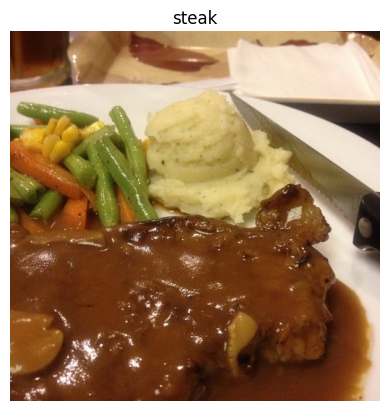

In [4]:
img = view_randow_image(target_dir='pizza_steak/train/', target_class='steak')

## preprocessing data

In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# set the seed 
tf.random.set_seed(42)

# get all pixel values between 0 & 1
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

#setup path
train_dir = "/home/kanza-laptop/Documents/belajar/python/lat/DeepLearning/pizza_steak/train"
test_dir = "/home/kanza-laptop/Documents/belajar/python/lat/DeepLearning/pizza_steak/test"

train_data = train_datagen.flow_from_directory(
    directory=train_dir,
    batch_size = 32,
    target_size = (224,224),
    class_mode = 'binary',
    seed = 42
    )

valid_data = train_datagen.flow_from_directory(
    directory= test_dir,
    batch_size = 32,
    target_size = (224,224),
    class_mode = 'binary',
    seed = 42
)

2024-11-19 14:24:53.017259: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-19 14:24:53.020759: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-19 14:24:53.031222: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-19 14:24:53.048482: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-19 14:24:53.053486: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-19 14:24:53.066470: I tensorflow/core/platform/cpu_feature_gu

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


## model_1

In [6]:
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(
        filters=10,
        kernel_size=3,
        activation="relu",
        input_shape = (224,224,3)
    ),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),
    tf.keras.layers.Conv2D(10,3, activation="relu"),
    tf.keras.layers.Conv2D(10,3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_1.compile(
    loss = tf.keras.losses.binary_crossentropy,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

history_1 = model_1.fit(
                train_data,
                epochs = 5,
                steps_per_epoch=len(train_data),
                validation_data = valid_data,
                validation_steps = len(valid_data),
                verbose = 1
                )

/home/kanza-laptop/Documents/belajar/python/lat/lat1/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/home/kanza-laptop/Documents/belajar/python/lat/lat1/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 28s 564ms/step - accuracy: 0.5878 - loss: 0.6883 - val_accuracy: 0.6960 - val_loss: 0.5836
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 339us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/5


2024-11-19 14:25:22.652560: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/usr/lib/python3.12/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)
2024-11-19 14:25:22.657773: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


47/47 ━━━━━━━━━━━━━━━━━━━━ 26s 546ms/step - accuracy: 0.7731 - loss: 0.5039 - val_accuracy: 0.7240 - val_loss: 0.5137
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 182us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/5


2024-11-19 14:25:48.395167: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


47/47 ━━━━━━━━━━━━━━━━━━━━ 26s 549ms/step - accuracy: 0.8011 - loss: 0.4505 - val_accuracy: 0.8440 - val_loss: 0.3697


In [7]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 110, 110, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 108, 108, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 106, 106, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 53, 53, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 28090)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │        28,091 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,305 (364.48 KB)

 Trainable params: 31,101 (121.49 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,204 (242.99 KB)

# model_2 menggunakan layer klasifikasi pada dataset biasa(bukan gambar)

In [8]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_2.compile(
    loss = tf.keras.losses.binary_crossentropy,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

history__2 = model_2.fit(
    train_data,
    epochs = 5,
    steps_per_epoch=len(train_data),
    validation_data= valid_data,
    validation_steps=len(valid_data),
    verbose = 1
)


Epoch 1/5


/home/kanza-laptop/Documents/belajar/python/lat/lat1/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - accuracy: 0.4872 - loss: 0.9541 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 249us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - accuracy: 0.5122 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 142us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/5
 3/47 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.4983 - loss: 0.6932

2024-11-19 14:26:21.535323: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - accuracy: 0.4999 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932


In [9]:
model_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │       602,116 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,806,425 (6.89 MB)

 Trainable params: 602,141 (2.30 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,204,284 (4.59 MB)

## model_3 improve model than before

In [10]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape= (224,224,3)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_3.compile(
    loss =  tf.keras.losses.binary_crossentropy,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

history_3 = model_3.fit(
    train_data,
    epochs = 5,
    steps_per_epoch = len(train_data),
    validation_data = valid_data,
    validation_steps = len(valid_data)
)

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 148ms/step - accuracy: 0.5842 - loss: 3.8595 - val_accuracy: 0.5140 - val_loss: 1.8103
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 259us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 144ms/step - accuracy: 0.6813 - loss: 0.8803 - val_accuracy: 0.6320 - val_loss: 1.3237
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 147us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 145ms/step - accuracy: 0.7128 - loss: 0.7828 - val_accuracy: 0.7820 - val_loss: 0.4655


## preprocess again

In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# set the seed 
tf.random.set_seed(42)

# get all pixel values between 0 & 1
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

#setup path
train_dir = "/home/kanza-laptop/Documents/belajar/python/lat/DeepLearning/pizza_steak/train"
test_dir = "/home/kanza-laptop/Documents/belajar/python/lat/DeepLearning/pizza_steak/test"

train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode='binary',
                                             batch_size=32)



Found 1500 images belonging to 2 classes.


Found 500 images belonging to 2 classes.


In [12]:
images, labels = train_data.__next__()
len(images), len(labels)

(32, 32)

In [13]:
len(train_data)

47

In [14]:
images[:2]

array([[[[0.07843138, 0.03921569, 0.03529412],
         [0.08235294, 0.03529412, 0.03529412],
         [0.09019608, 0.04313726, 0.04313726],
         ...,
         [0.8313726 , 0.6431373 , 0.49411768],
         [0.8235295 , 0.63529414, 0.48627454],
         [0.81568635, 0.627451  , 0.4784314 ]],

        [[0.08235294, 0.04313726, 0.03921569],
         [0.08627451, 0.03921569, 0.03921569],
         [0.09019608, 0.04313726, 0.04313726],
         ...,
         [0.82745105, 0.6392157 , 0.4901961 ],
         [0.8235295 , 0.63529414, 0.48627454],
         [0.8117648 , 0.62352943, 0.47450984]],

        [[0.08235294, 0.04313726, 0.03529412],
         [0.08235294, 0.03921569, 0.03137255],
         [0.08627451, 0.04313726, 0.03529412],
         ...,
         [0.8078432 , 0.61960787, 0.47058827],
         [0.8196079 , 0.6313726 , 0.48235297],
         [0.8196079 , 0.6313726 , 0.48235297]],

        ...,

        [[0.98823535, 0.74509805, 0.34901962],
         [0.98823535, 0.74509805, 0.34901962]

## model_4 building baseline

https://paperswithcode.com/sota/image-classification-on-imagenet

In [15]:
 model_4 = tf.keras.Sequential([
  tf.keras.layers.Conv2D(
   filters=10,
   kernel_size=(3,2),
   strides = (1,1),
   padding = "valid",
   activation = "relu",
   input_shape = (224,224,3),
  ),
  tf.keras.layers.Conv2D(10,3, activation="relu"),
  tf.keras.layers.Conv2D(10,3,activation="relu"),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid")
 ])

/home/kanza-laptop/Documents/belajar/python/lat/lat1/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
